In [1]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.utils.data as tdata
from torch.utils.data import DataLoader
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,precision_recall_curve,roc_curve,det_curve, auc
import matplotlib.pyplot as plt

In [2]:
def update_weigth(model):
  nn.init.xavier_uniform_(model.c1.weight)
  nn.init.xavier_uniform_(model.c2.weight)

def update_step(data, label):
  prediction = model(data)
  optimizer.zero_grad()
  loss = criterion(prediction, label)
  loss.backward()
  optimizer.step()
  return loss.item()
  

def update_step2(data, label):
  prediction = model2(data)
  optimizer2.zero_grad()
  loss = criterion2(prediction, label)
  loss.backward()
  optimizer2.step()
  return loss.item()

def update_step3(data, label):
  prediction = model3(data)
  optimizer.zero_grad()
  loss = criterion(prediction, label)
  loss.backward()
  optimizer.step()
  return loss.item()


In [3]:
train_data = MNIST(root='~/datasets/', train=True, download=True, transform=transforms.ToTensor())
train_data.data = train_data.data.reshape(-1,28*28)
train_loader = DataLoader(train_data, shuffle=True, batch_size=32)
test_data  = MNIST(root='~/datasets/', train=False, download=True,transform=transforms.ToTensor())
test_loader  = DataLoader(test_data, shuffle=True, batch_size=32)

test_data.data  = test_data.data.reshape(-1,28*28)

mnist_train, mnist_valid = tdata.random_split(train_data, [50_000,10_000])


valid_loader = tdata.DataLoader(mnist_valid, shuffle=False, batch_size=256)


100%|██████████| 9912422/9912422 [00:00<00:00, 99133295.92it/s]


Extracting /root/datasets/MNIST/raw/train-images-idx3-ubyte.gz to /root/datasets/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 18101568.11it/s]


Extracting /root/datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /root/datasets/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25478433.24it/s]


Extracting /root/datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/datasets/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 786334.62it/s]

Extracting /root/datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/datasets/MNIST/raw



In [ ]:
class MLP(nn.Module):
  def __init__ (self, input_size, hidden_size, output_size):
    super(MLP, self).__init__()
    self.c1 = nn.Linear(input_size, hidden_size)
    self.c2 = nn.Linear(hidden_size, output_size)

  def forward(self,x):                    # funcion de activacion para las capas ocultas 
    x=torch.sigmoid(self.c1(x))
    x=torch.softmax(self.c2(x), dim=1)
    return x



#parametros
tam = 784 #tamaño de la imagen 
num_oculta = 25 #numero de neurona
tam_salida = 10 #numero de repeticiones
lr = 0.1 # tasa de aprendizaje 
tam_min_batch = 32 # tamaño del mini batch
iter_train = 5 # iteraciones de entrenamiento 
aux=0
cont=0
model = MLP(tam, num_oculta, tam_salida)
update_weigth(model)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
#train_loss=np.zeros(shape=(iter_train, 1))
# entrenamiento de la red
for epoch in range(iter_train):
  loss=0
  for i , (images,labels) in enumerate(train_loader):
    images = images.reshape(-1,tam)
    loss+=update_step(images,labels)
    
    if (i+1)%100==0:

      print('Epoch [{}/{}], step [{}/{}], loss: {:.4f}'.format(epoch+1, iter_train,i+1,len(train_loader), loss))
  
  #evaluo el modelo en test_loader
  with torch.no_grad():
    label=[] # valores reales 
    pred=[] # valores predecidos 
    #test_salida=[] # resultado 
    correct = 0
    total = 0
    for images,labels in test_loader:

      images = images.reshape(-1,tam)
      salida = model(images)
      _,predicted = torch.max(salida.data,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      label += labels.tolist()
      pred += salida.tolist() 
    print("Exactitud del modelo en las test de imagen: ",(100 * correct / total))




Epoch [1/5], step [100/1875], loss: 229.9257
Epoch [1/5], step [200/1875], loss: 457.8151
Epoch [1/5], step [300/1875], loss: 682.2637
Epoch [1/5], step [400/1875], loss: 903.4825
Epoch [1/5], step [500/1875], loss: 1121.8218
Epoch [1/5], step [600/1875], loss: 1337.3508
Epoch [1/5], step [700/1875], loss: 1550.5944
Epoch [1/5], step [800/1875], loss: 1760.9825
Epoch [1/5], step [900/1875], loss: 1967.7784
Epoch [1/5], step [1000/1875], loss: 2173.3616
Epoch [1/5], step [1100/1875], loss: 2376.1482
Epoch [1/5], step [1200/1875], loss: 2576.8861
Epoch [1/5], step [1300/1875], loss: 2777.7976
Epoch [1/5], step [1400/1875], loss: 2976.2633
Epoch [1/5], step [1500/1875], loss: 3173.0583
Epoch [1/5], step [1600/1875], loss: 3367.5843
Epoch [1/5], step [1700/1875], loss: 3562.1040
Epoch [1/5], step [1800/1875], loss: 3754.4249
Exactitud del modelo en las test de imagen:  58.36
Epoch [2/5], step [100/1875], loss: 191.0804
Epoch [2/5], step [200/1875], loss: 382.5139
Epoch [2/5], step [300/187

In [ ]:
x=np.array(pred)
x.shape

(10000, 10)

# curva det

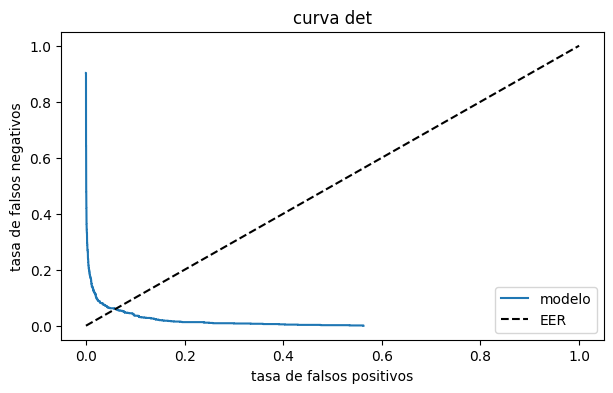

In [ ]:
dv=9
label = np.array(label)
score = np.array(pred)
fpr_dc, fnr_dc, th_dc = det_curve(label==dv, y_score=score[:,dv])
fig,ax=plt.subplots(figsize=(7,4))
ax.plot(fpr_dc,fnr_dc,label='modelo')
ax.plot([0, 1], [0, 1], 'k--', label='EER')
ax.set_xlabel('tasa de falsos positivos')
ax.set_ylabel('tasa de falsos negativos')
plt.title('curva det')
ax.legend()

# curva roc

Text(0.5, 1.0, 'Cuva roc')

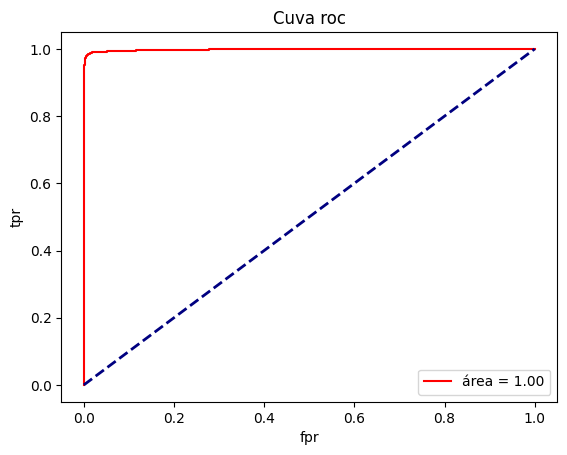

In [ ]:
dv=9
labels_all = []  # lista de etiquetas de todas las imágenes de prueba
scores_all = []  # lista de puntajes de todas las imágenes de prueba
with torch.no_grad():
  for images, labels in test_loader:
    images = images.reshape(-1, tam)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    labels_all += labels.tolist()
    scores_all += [output[1] for output in outputs.tolist()]  


scores_all=np.array(scores_all)

fpr, tpr, _ = roc_curve(labels_all,scores_all, pos_label=1) #np.array(test_prediction)  YYP[:,dv]
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,color='red',label='área = %0.2f'%roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Cuva roc')

In [ ]:
test_targets=test_data.targets.numpy()
prediction_test=[]
for mbdata, label in test_loader:
    mbdata = mbdata.reshape(-1, tam)
    logits = model(mbdata).detach()
    prediction_test.append(logits.argmax(dim=1).numpy())
prediction_test = np.concatenate(prediction_test)
cont=0
for i in range(len(test_targets)):
  if test_targets[i]==0:
    cont=cont+1
cont
#from sklearn.metrics import ConfusionMatrixDisplay, classification_report
#ConfusionMatrixDisplay.from_predictions(test_targets, prediction_test);

980

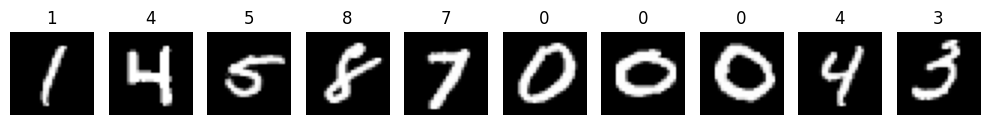

In [ ]:
fig, ax = plt.subplots(1,10,figsize=(10,2), tight_layout=True)
idx = np.random.permutation(len(train_data))[:10]
for k in range(10):
  image,label=train_data[idx[k]]
  ax[k].imshow(image[0,:,:].numpy().reshape(28,28),cmap=plt.cm.Greys_r)
  ax[k].axis('off')
  ax[k].set_title(label)

In [ ]:
class MLP2(nn.Module):
  def __init__ (self, input_size, hidden_size, output_size):
    super(MLP2, self).__init__()
    self.c1 = nn.Linear(input_size, hidden_size)
    self.c2 = nn.Linear(hidden_size, output_size)

  def forward(self,x):                    # funcion de activacion para las capas ocultas 
    x=torch.sigmoid(self.c1(x))
    x=self.c2(x)
    return x

#parametros
tam = 784 #tamaño de la imagen 
num_oculta = 25 #numero de neurona
tam_salida = 10 #numero de repeticiones
lr = 0.1 # tasa de aprendizaje 
tam_min_batch = 32 # tamaño del mini batch
iter_train = 5 # iteraciones de entrenamiento
cont=0 
model2 = MLP2(tam, num_oculta, 1)
update_weigth(model2)
criterion2 = nn.MSELoss() # cambio de funcion objetivo 
optimizer2 = torch.optim.SGD(model2.parameters(), lr=lr)
train_loss2=np.zeros(shape=(iter_train, 1))
# entrenamiento de la red
for epoch in range(iter_train):
  loss=0
  aux=0
  for i , (images,labels) in enumerate(train_loader):
    images = images.reshape(-1,tam) # ojo con los tamaños de la entrada y salida,
    labels = labels.reshape(-1, 1).float() # estas deben ser las mismas 
    loss+=update_step2(images,labels)
    if (i+1)%100==0:
        print('Epoch [{}/{}], step [{}/{}], loss: {:.4f}'.format(epoch+1, iter_train,i+1,len(train_loader), loss))
    

  #evaluo con el data test
  with torch.no_grad():
    label=[]
    pred=[]
  
    correct = 0
    total = 0
    for images,labels in test_loader:
      images = images.reshape(-1,tam)
      salida = model2(images)
      _,predicted = torch.max(salida.data,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item() 
      label += labels.tolist()
      pred += salida.tolist()
   


    print("Exactitud del modelo en las test de imagen: ",(100 * correct / total))




Epoch [1/5], step [100/1875], loss: 548.2839
Epoch [1/5], step [200/1875], loss: 839.7313
Epoch [1/5], step [300/1875], loss: 1112.0966
Epoch [1/5], step [400/1875], loss: 1340.6700
Epoch [1/5], step [500/1875], loss: 1540.7701
Epoch [1/5], step [600/1875], loss: 1747.5869
Epoch [1/5], step [700/1875], loss: 1928.8471
Epoch [1/5], step [800/1875], loss: 2095.9648
Epoch [1/5], step [900/1875], loss: 2245.4430
Epoch [1/5], step [1000/1875], loss: 2414.1533
Epoch [1/5], step [1100/1875], loss: 2567.1973
Epoch [1/5], step [1200/1875], loss: 2733.3635
Epoch [1/5], step [1300/1875], loss: 2888.1143
Epoch [1/5], step [1400/1875], loss: 3023.0765
Epoch [1/5], step [1500/1875], loss: 3166.3111
Epoch [1/5], step [1600/1875], loss: 3306.4011
Epoch [1/5], step [1700/1875], loss: 3443.6361
Epoch [1/5], step [1800/1875], loss: 3577.3662
Exactitud del modelo en las test de imagen:  9.8
Epoch [2/5], step [100/1875], loss: 128.8301
Epoch [2/5], step [200/1875], loss: 256.3269
Epoch [2/5], step [300/187

# curva det con funcion obj:MSELoss()


In [ ]:
# aux=0
# for k in range(len(np.array(label))):
#   if label[k]==9:
#     aux=aux+1
# aux
xx=np.array(pred)
xx.shape

(10000, 1)

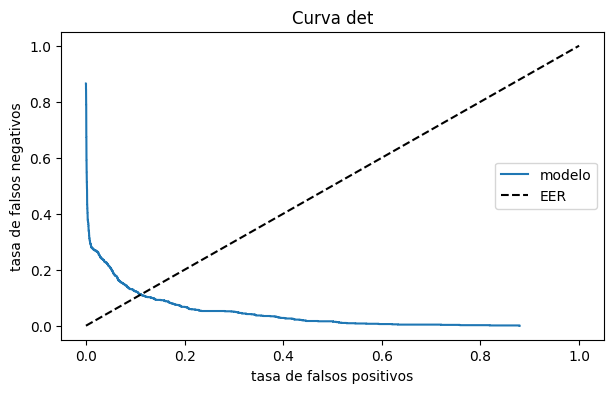

In [ ]:
dv=9
label=np.array(label)
score=np.array(pred)
dv_score=score[:,0]
fpr_dc, fnr_dc, th_dc = det_curve(label==dv, y_score=dv_score)
fig,ax=plt.subplots(figsize=(7,4))
ax.plot(fpr_dc,fnr_dc,label='modelo')
ax.plot([0, 1], [0, 1], 'k--', label='EER')
ax.set_xlabel('tasa de falsos positivos')
ax.set_ylabel('tasa de falsos negativos')
plt.title('Curva det')
ax.legend()

# curva roc del modelo con funcion obj: MSELOSS

Text(0.5, 1.0, 'Curva roc')

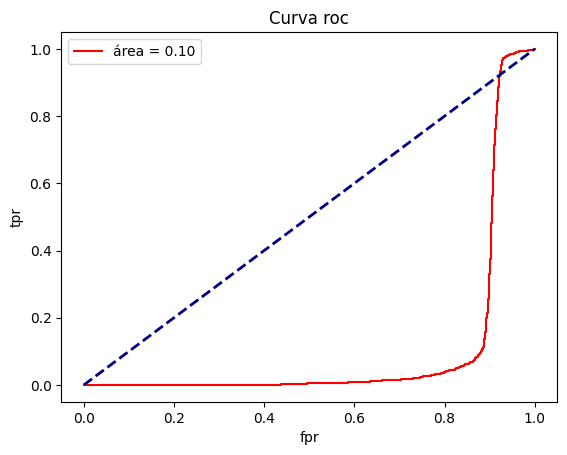

In [ ]:
labels_all = []  # lista de etiquetas de todas las imágenes de prueba
scores_all = []  # lista de puntajes de todas las imágenes de prueba
with torch.no_grad():
  for images, labels in test_loader:
    images = images.reshape(-1, tam)
    outputs = model2(images)
    _, predicted = torch.max(outputs.data, 1)
    labels_all += labels.tolist()
    if len(outputs.shape) == 1: # Si la salida es una matriz 1D
      scores_all += outputs.tolist()
    else: # Si la salida es una matriz 2D
      scores_all += [output[0] for output in outputs.tolist()]  

scores_all=np.array(scores_all)
roc_auc = auc(fpr, tpr)
fpr, tpr, _ = roc_curve(labels_all,scores_all, pos_label=1) #np.array(test_prediction)  YYP[:,dv]
plt.plot(fpr,tpr,color='red',label='área = %0.2f'%roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Curva roc')

In [ ]:
from sklearn.metrics import confusion_matrix

test_targets = test_data.targets.numpy()
model2.eval()

with torch.no_grad():
    predictions = []
    for images, _ in test_loader:
        images = images.reshape(-1, tam)
        outputs = model2(images)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        _, predicted = torch.max(probabilities, 1)
        predictions.extend(predicted.numpy())

cm = confusion_matrix(test_targets, predictions)
print(cm)

[[ 980    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0    0    0]
 [1028    0    0    0    0    0    0    0    0    0]
 [ 974    0    0    0    0    0    0    0    0    0]
 [1009    0    0    0    0    0    0    0    0    0]]


#2.2 

Para ello compare
cualitativa y cuantitativamente el entrenamiento y desempeño 
nal del clasi
cador para los siguientes valores
de tasa de aprendizaje: 10−2
, 10−1
, 100 y 101
. ¾Cómo cambian los tiempos de entrenamiento y tasa de error
alcanzados? ¾Qué ocurre con la estabilidad del entrenamiento para tasas altas?

In [ ]:
class MLP(nn.Module):
  def __init__ (self, input_size, hidden_size, output_size):
    super(MLP, self).__init__()
    self.c1 = nn.Linear(input_size, hidden_size)
    self.c2 = nn.Linear(hidden_size, output_size)

  def forward(self,x):                    # funcion de activacion para las capas ocultas 
    x=torch.sigmoid(self.c1(x))
    x=torch.softmax(self.c2(x), dim=1)
    return x



#parametros
tam = 784 #tamaño de la imagen 
num_oculta = 25 #numero de neurona
tam_salida = 10 #numero de repeticiones
lr = 0.1 # tasa de aprendizaje 
tasa_aprendizaje=[0.01,0.1,1,10]
tam_min_batch = 32 # tamaño del mini batch
iter_train = 5 # iteraciones de entrenamiento 
aux=0
cont=0

model3 = MLP(tam, num_oculta, tam_salida)

update_weigth(model3)

criterion = nn.CrossEntropyLoss()
loss_tasa=np.zeros((len(tasa_aprendizaje),iter_train))*np.NaN
train_loss=np.zeros(shape=(iter_train, 1))
# entrenamiento de la red
for idx_lr in range(len(tasa_aprendizaje)):
  optimizer = torch.optim.SGD(model3.parameters(), lr=tasa_aprendizaje[idx_lr])
  for epoch in range(iter_train):
    loss=0
    for i , (images,labels) in enumerate(train_loader):
      images = images.reshape(-1,tam)
      loss+=update_step3(images,labels)
      if (i+1)%100==0:
          print('Epoch [{}/{}], step [{}/{}], loss: {:.4f}'.format(epoch+1, iter_train,i+1,len(train_loader), loss))
    loss_tasa[idx_lr,epoch]=loss
    
    with torch.no_grad():
      test_targets=[]
      test_prediction=[]
      correct = 0
      total = 0
      for images,labels in test_loader:
        images = images.reshape(-1,tam)
        salida = model3(images)
        _,predicted = torch.max(salida.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_targets += labels.tolist()
        test_prediction += salida.tolist()
     
        
  print("Exactitud del modelo en las test de imagen: ",(100 * correct / total))

Epoch [1/5], step [100/1875], loss: 230.2240
Epoch [1/5], step [200/1875], loss: 460.3317
Epoch [1/5], step [300/1875], loss: 690.4498
Epoch [1/5], step [400/1875], loss: 920.3286
Epoch [1/5], step [500/1875], loss: 1150.0901
Epoch [1/5], step [600/1875], loss: 1379.6250
Epoch [1/5], step [700/1875], loss: 1609.1136
Epoch [1/5], step [800/1875], loss: 1838.7839
Epoch [1/5], step [900/1875], loss: 2068.1234
Epoch [1/5], step [1000/1875], loss: 2297.2339
Epoch [1/5], step [1100/1875], loss: 2526.1486
Epoch [1/5], step [1200/1875], loss: 2755.0241
Epoch [1/5], step [1300/1875], loss: 2983.5955
Epoch [1/5], step [1400/1875], loss: 3212.2374
Epoch [1/5], step [1500/1875], loss: 3440.5321
Epoch [1/5], step [1600/1875], loss: 3668.7974
Epoch [1/5], step [1700/1875], loss: 3896.7388
Epoch [1/5], step [1800/1875], loss: 4124.7027
Epoch [2/5], step [100/1875], loss: 227.6229
Epoch [2/5], step [200/1875], loss: 454.8860
Epoch [2/5], step [300/1875], loss: 681.9649
Epoch [2/5], step [400/1875], lo

In [ ]:
aux=0
list=[]

for i in range(loss_tasa.shape[0]):
  mean=loss_tasa[i].mean()
  list.append(mean)
  std=loss_tasa[i].std()
  print('Error promedio de {} epoch: {:.4f}'.format(i,mean))
  print('desviacion estandar de {} epoch: {}\n'.format(i,std))
print('el menor error es de: ',min(list))

Error promedio de 0 epoch: 4093.1720
desviacion estandar de 0 epoch: 159.77173349756035

Error promedio de 1 epoch: 3227.5905
desviacion estandar de 1 epoch: 145.61231095474983

Error promedio de 2 epoch: 3022.3476
desviacion estandar de 2 epoch: 37.781280915504645

Error promedio de 3 epoch: 2877.7360
desviacion estandar de 3 epoch: 17.732811398432464

el menor error es de:  2877.7360459566116


#3

Considere la mejor tasa de aprendizaje encontrada en el punto anterior, es decir, con un buen compromiso
entre rapidez, estabilidad y tasa de acierto 
nal. Determine experimentalmente el número óptimo de unidades
en la capa oculta (N) en función de los resultados obtenidos en el conjunto de validación ( % de clasi
caciones
correctas). Entregue los resultados de porcentaje promedio de clasi
caciones correctas según N. Experimente
con 1, 10, 25 y 100 neuronas, así como también eliminando la capa oculta (requiere modi
car levemente el
código). Modi
que el criterio de early stopping, aumentando a 1000 las validaciones consecutivas permitidas
que empeoran el loss, de forma tal que pueda observar el sobreajuste. Recuerde repetir 5 veces sus experimentos
para que sus comparaciones tengan validez y no sean fruto del azar en la inicialización.

In [ ]:
criterion = nn.CrossEntropyLoss()
best_loss = 10 # best_lr

# Definir los valores de N a probar
hidden_units = [1, 10, 25, 100, 0]

# Repetir el experimento 5 veces
for repeat in range(5):
    print(f'Experimento {repeat+1}/5')
    for N in hidden_units:
        if N == 0:
            # Caso sin capa oculta
            net = nn.Sequential(
                nn.Linear(784, 10)
            )
        else:
            # Caso con capa oculta
            net = nn.Sequential(
                nn.Linear(784, N),
                nn.Sigmoid(),
                nn.Linear(N, 10)
            )

        # Definir el optimizador con la tasa de aprendizaje correspondiente
        optimizer = torch.optim.SGD(net.parameters(), lr=best_loss)

        # Entrenar el modelo
        best_loss = np.inf
        no_improvement = 0
        for epoch in range(10):
            running_loss = 0.0
            for i, (inputs, labels) in enumerate(train_loader, 0):
                # Reiniciar los gradientes
                optimizer.zero_grad()

                # Hacer una pasada hacia adelante y calcular el costo
                inputs = inputs.view(-1, 784)
                outputs = net(inputs)
                loss = criterion(outputs, labels)

                # Hacer una pasada hacia atrás y actualizar los pesos
                loss.backward()
                optimizer.step()

                # Imprimir estadísticas
                running_loss += loss.item()
                if i % 1000 == 999:    # Imprimir cada 1000 mini-batches
                    print('[%d, %5d] loss: %.3f' %
                          (epoch + 1, i + 1, running_loss / 1000))
                    running_loss = 0.0

            # Evaluar el modelo en el conjunto de validación después de cada época
            labels_all = np.array([])
            scores_all = np.empty((0, 10))
            with torch.no_grad():
                for data in test_loader:
                    inputs, labels = data
                    inputs = inputs.view(-1, 784)
                    outputs = net(inputs)
                    labels_all = np.append(labels_all, labels.numpy())
                    scores_all = np.vstack((scores_all, outputs.numpy()))

            # Calcular el error y guardar el resultado
            y_pred = np.argmax(scores_all, axis=1)
            error = np.mean(y_pred != labels_all)
            print(f'Error para entrenamiento {repeat+1}/5, época {epoch+1}/100, N={N}: {error}')

            # Actualizar el criterio de early stopping
            if error < best_loss:
                best_loss = error
                no_improvement = 0
            else:
                no_improvement += 1
                if no_improvement >= 1000:
                    break

        print(f'Finalizado entrenamiento para N={N}')

    print(f'Finalizado experimento {repeat+1}/5')


Experimento 1/5
[1,  1000] loss: 2.190
Error para entrenamiento 1/5, época 1/100, N=1: 0.7887
[2,  1000] loss: 2.155
Error para entrenamiento 1/5, época 2/100, N=1: 0.7892
[3,  1000] loss: 2.135
Error para entrenamiento 1/5, época 3/100, N=1: 0.7974
[4,  1000] loss: 2.145
Error para entrenamiento 1/5, época 4/100, N=1: 0.7874
[5,  1000] loss: 2.149
Error para entrenamiento 1/5, época 5/100, N=1: 0.7932
[6,  1000] loss: 2.144
Error para entrenamiento 1/5, época 6/100, N=1: 0.789
[7,  1000] loss: 2.141
Error para entrenamiento 1/5, época 7/100, N=1: 0.793
[8,  1000] loss: 2.142
Error para entrenamiento 1/5, época 8/100, N=1: 0.7897
[9,  1000] loss: 2.138
Error para entrenamiento 1/5, época 9/100, N=1: 0.7888
[10,  1000] loss: 2.134
Error para entrenamiento 1/5, época 10/100, N=1: 0.7864
Finalizado entrenamiento para N=1
[1,  1000] loss: 0.524
Error para entrenamiento 1/5, época 1/100, N=10: 0.1034
[2,  1000] loss: 0.317
Error para entrenamiento 1/5, época 2/100, N=10: 0.0837
[3,  1000] l

4)
Con la tasa de aprendizaje ya elegida y el mejor número de neuronas ocultas, compare el algoritmo de
gradiente descendente estocástico con ADAM. Utilice los parámetros por defecto que tensor
ow tiene para
ADAM. Compare las mejores tasas de acierto encontradas por ambos algoritmos, tanto para entrenamiento
como para validación. ¾Qué ventajas observa al utilizar el algoritmo ADAM? Recuerde ejecutar 5 veces.

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train_dataset = MNIST('data', train=True, download=True, transform=transform)
valid_dataset = MNIST('data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=32, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 104945972.35it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 43016936.73it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26472108.91it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13359417.09it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [8]:
net = nn.Sequential(
    nn.Linear(784, 25),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(25, 25),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(25, 10),
    nn.LogSoftmax(dim=1)
)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# Entrenar el modelo
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        inputs = inputs.view(-1, 784)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 1000 == 999:    
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Entrenamiento terminado')


labels_all = []
scores_all = []
correct = 0
total=0
with torch.no_grad():
    for data in valid_loader:
        inputs, labels = data
        inputs = inputs.view(-1, 784)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        labels_all += labels.tolist()
        scores_all += outputs.tolist()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('La precision de la red en %d imagenes es de: %d %%' % (total, 100 * correct / total))

[1,  1000] loss: 1.742
[2,  1000] loss: 1.719
[3,  1000] loss: 1.730
[4,  1000] loss: 1.717
[5,  1000] loss: 1.728
Entrenamiento terminado
La precision de la red en 10000 imagenes es de: 34 %


In [9]:
#SGD
net_sgd = nn.Sequential(
    nn.Linear(784, 25),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(25, 25),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(25, 10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()
optimizer_sgd = torch.optim.SGD(net_sgd.parameters(), lr=0.01)

# listas para graficar resultados
train_losses_sgd = []  
valid_losses_sgd = []
train_acc_sgd = []
valid_acc_sgd = []

for epoch in range(5):
    train_loss = 0
    valid_loss = 0
    train_correct = 0
    valid_correct = 0

    # Entrenamiento
    net_sgd.train()
    for data, target in train_loader:
        optimizer_sgd.zero_grad()
        output = net_sgd(data.view(-1, 28*28))
        loss = criterion(output, target)
        loss.backward()
        optimizer_sgd.step()
        train_loss += loss.item()*data.size(0)
        _, pred = torch.max(output, 1)
        train_correct += torch.sum(pred == target)

    # Validación
    net_sgd.eval()
    for data, target in valid_loader:
        output = net_sgd(data.view(-1, 28*28))
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
        _, pred = torch.max(output, 1)
        valid_correct += torch.sum(pred == target)

    # Calcular métricas de entrenamiento y validación
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    train_losses_sgd.append(train_loss)
    valid_losses_sgd.append(valid_loss)

    train_acc = train_correct/len(train_loader.dataset)
    valid_acc = valid_correct/len(valid_loader.dataset)
    train_acc_sgd.append(train_acc)
    valid_acc_sgd.append(valid_acc)

    print('Epoch: {} \tTraining Loss: {:.6f} \tTraining Acc: {:.6f} \tValidation Loss: {:.6f} \tValidation Acc: {:.6f}'.format(epoch+1, train_loss, train_acc, valid_loss, valid_acc))

Epoch: 1 	Training Loss: 1.508943 	Training Acc: 0.458050 	Validation Loss: 0.650088 	Validation Acc: 0.856300
Epoch: 2 	Training Loss: 1.043954 	Training Acc: 0.635100 	Validation Loss: 0.480515 	Validation Acc: 0.894500
Epoch: 3 	Training Loss: 0.935975 	Training Acc: 0.679967 	Validation Loss: 0.403449 	Validation Acc: 0.907800
Epoch: 4 	Training Loss: 0.886027 	Training Acc: 0.701950 	Validation Loss: 0.379607 	Validation Acc: 0.910300
Epoch: 5 	Training Loss: 0.853565 	Training Acc: 0.715000 	Validation Loss: 0.355787 	Validation Acc: 0.913200


In [10]:
#ADAM torch.optim.adam
net_adam = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(100, 10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()
optimizer_adam = torch.optim.Adam(net_adam.parameters())

train_losses_adam = []
valid_losses_adam = []
train_acc_adam = []
valid_acc_adam = []

for epoch in range(5):
    train_loss = 0
    valid_loss = 0
    train_correct = 0
    valid_correct = 0

    # Entrenamiento
    net_adam.train()
    for data, target in train_loader:
        optimizer_adam.zero_grad()
        output = net_adam(data.view(-1, 28*28))
        loss = criterion(output, target)
        loss.backward()
        optimizer_adam.step()
        train_loss += loss.item()*data.size(0)
        _, pred = torch.max(output, 1)
        train_correct += torch.sum(pred == target)

    # Validación
    net_adam.eval()
    for data, target in valid_loader:
        output = net_adam(data.view(-1, 28*28))
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
        _, pred = torch.max(output, 1)
        valid_correct += torch.sum(pred == target)

    # Calcular métricas de entrenamiento y validación
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    train_losses_adam.append(train_loss)
    valid_losses_adam.append(valid_loss)

    train_acc = train_correct/len(train_loader.dataset)
    valid_acc = valid_correct/len(valid_loader.dataset)
    train_acc_adam.append(train_acc)
    valid_acc_adam.append(valid_acc)

    print('Epoch: {} \tTraining Loss: {:.6f} \tTraining Acc: {:.6f} \tValidation Loss: {:.6f} \tValidation Acc: {:.6f}'.format(epoch+1, train_loss, train_acc, valid_loss, valid_acc))

Epoch: 1 	Training Loss: 0.548850 	Training Acc: 0.831300 	Validation Loss: 0.207684 	Validation Acc: 0.935900
Epoch: 2 	Training Loss: 0.346806 	Training Acc: 0.898133 	Validation Loss: 0.163111 	Validation Acc: 0.949900
Epoch: 3 	Training Loss: 0.312868 	Training Acc: 0.909383 	Validation Loss: 0.150115 	Validation Acc: 0.953800
Epoch: 4 	Training Loss: 0.291719 	Training Acc: 0.915500 	Validation Loss: 0.147281 	Validation Acc: 0.957200
Epoch: 5 	Training Loss: 0.276449 	Training Acc: 0.919717 	Validation Loss: 0.136621 	Validation Acc: 0.961400


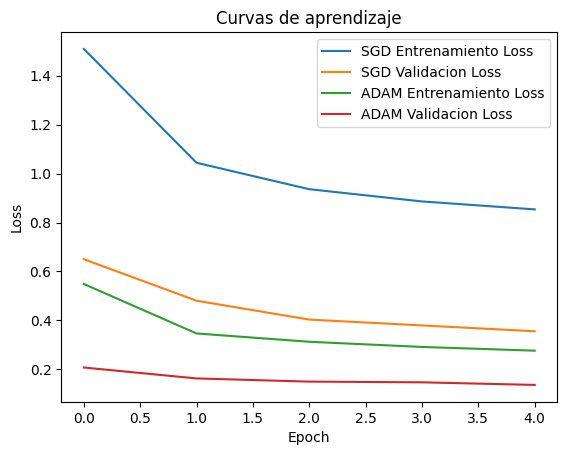

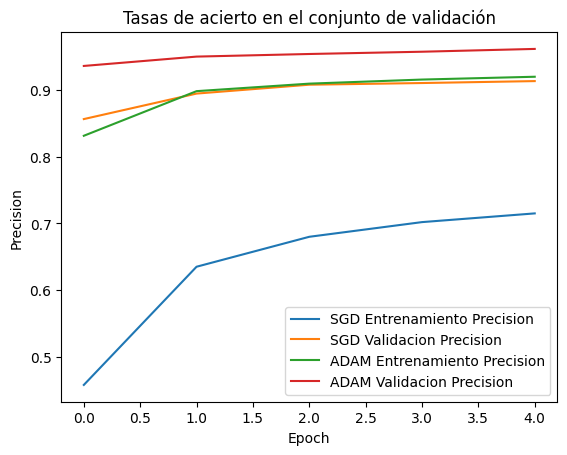

In [14]:
# Graficar las curvas de aprendizaje para SGD y ADAM
plt.plot(train_losses_sgd, label='SGD Entrenamiento Loss')
plt.plot(valid_losses_sgd, label='SGD Validacion Loss')
plt.plot(train_losses_adam, label='ADAM Entrenamiento Loss')
plt.plot(valid_losses_adam, label='ADAM Validacion Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Curvas de aprendizaje')
plt.legend()
plt.show()

# Graficar las tasas de acierto en el conjunto de validación para SGD y ADAM
plt.plot(train_acc_sgd, label='SGD Entrenamiento Precision')
plt.plot(valid_acc_sgd, label='SGD Validacion Precision')
plt.plot(train_acc_adam, label='ADAM Entrenamiento Precision')
plt.plot(valid_acc_adam, label='ADAM Validacion Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Tasas de acierto en el conjunto de validación')
plt.legend()
plt.show()

In [12]:
print('SGD - Precision : %d %%' % (100 * valid_acc_sgd[-1]))
print('ADAM - Precision  : %d %%' % (100 * valid_acc_adam[-1]))

SGD - Precision : 91 %
ADAM - Precision  : 96 %


5) Modique la función de costos añadiendo una penalización por norma L2 de los pesos (a.k.a. weight decay).
Modique el criterio de detención, cambiando el número de validaciones con error creciente de 15 a 1000.
Analice y recuerde ejecutar 5 veces.
Muestre y explique el fenómeno de sobreajuste para el modelo no regularizado. ¾Afecta la regularización al
sobreajuste? ¾Cómo impacta la penalización L2 al nivel de acierto alcanzado por la red? ¾Cómo cambia la
distribución de los pesos en el caso regularizado?


In [15]:
def net():
    return nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 10),
        nn.LogSoftmax(dim=1)
    )

network = net()
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

log_interval = 10

for epoch in range(5):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()

        # Aplanar las imágenes en un tensor de tamaño (batch_size, 784)
        images = images.view(images.size(0), -1)

        # Pasar las imágenes a través de la red neuronal
        outputs = network(images)

        # Calcular la pérdida y los gradientes
        loss = criterion(outputs, labels)
        loss.backward()

        # Actualizar los pesos de la red neuronal
        optimizer.step()

        # Imprimir estadísticas del entrenamiento
        if (i+1) % log_interval == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, 5, i+1, len(train_loader), loss.item()))

    # Evaluar la red neuronal en el conjunto de validación
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in valid_loader:
            images = images.view(images.size(0), -1)
            outputs = network(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Precisión de la red en las 10000 imágenes de validación: {} %'.format(total, 100 * correct / total))
      

Epoch [1/5], Step [10/1875], Loss: 0.9165
Epoch [1/5], Step [20/1875], Loss: 0.5815
Epoch [1/5], Step [30/1875], Loss: 0.3609
Epoch [1/5], Step [40/1875], Loss: 0.3200
Epoch [1/5], Step [50/1875], Loss: 0.4025
Epoch [1/5], Step [60/1875], Loss: 0.3559
Epoch [1/5], Step [70/1875], Loss: 0.4450
Epoch [1/5], Step [80/1875], Loss: 0.1993
Epoch [1/5], Step [90/1875], Loss: 0.4219
Epoch [1/5], Step [100/1875], Loss: 0.2379
Epoch [1/5], Step [110/1875], Loss: 0.6704
Epoch [1/5], Step [120/1875], Loss: 0.5701
Epoch [1/5], Step [130/1875], Loss: 0.4346
Epoch [1/5], Step [140/1875], Loss: 0.2130
Epoch [1/5], Step [150/1875], Loss: 0.7246
Epoch [1/5], Step [160/1875], Loss: 0.2713
Epoch [1/5], Step [170/1875], Loss: 0.8372
Epoch [1/5], Step [180/1875], Loss: 0.4990
Epoch [1/5], Step [190/1875], Loss: 0.2845
Epoch [1/5], Step [200/1875], Loss: 0.2543
Epoch [1/5], Step [210/1875], Loss: 0.8466
Epoch [1/5], Step [220/1875], Loss: 0.1971
Epoch [1/5], Step [230/1875], Loss: 0.4937
Epoch [1/5], Step [2